### Modeling

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn.svm import SVR


from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,plot_roc_curve,accuracy_score,roc_curve,roc_auc_score,recall_score

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import AdaBoostRegressor
from sklearn.feature_selection import SelectFwe, f_regression

In [73]:
X = df.drop('target',axis=1)
y = df['target']

In [74]:
X

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  
3        2   0     2  
4        2   0     2  
..     ...  ..   ...  
298      1   0     3  
299      1   0     3  
300      1   2     3  
301      1   1     3  
302      1   1     2  

[303 rows x 13 columns]

In [75]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [76]:
# Split the dataset into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [77]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


## XGBoost

In [115]:
xgb= XGBClassifier(loss='exponential', learning_rate=0.001, n_estimators=800, subsample=1.0, criterion='friedman_mse', 
                                  min_samples_split=2, 
                                  min_samples_leaf=5, min_weight_fraction_leaf=0.2, max_depth=20, min_impurity_decrease=0.1, 
                                  min_impurity_split=None, 
                                  init=None, random_state=None, max_features=None, verbose=1, max_leaf_nodes=None, warm_start=False, 
                                  presort='deprecated', 
                                  validation_fraction=0.2, n_iter_no_change=None, tol=0.0002)
                              
xgb.fit(X_train, Y_train)
Y_pred_xgb=xgb.predict(X_test)
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)
score_xgb

[20:57:10] WARNING: ..\src\learner.cc:541: 
Parameters: { criterion, loss, min_impurity_decrease, min_samples_leaf, min_samples_split, min_weight_fraction_leaf, presort, tol, validation_fraction, verbose, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:57:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


81.97

In [116]:
Y_pred_gnb = np.around(Y_pred_gnb)
print(metrics.classification_report(Y_test,Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



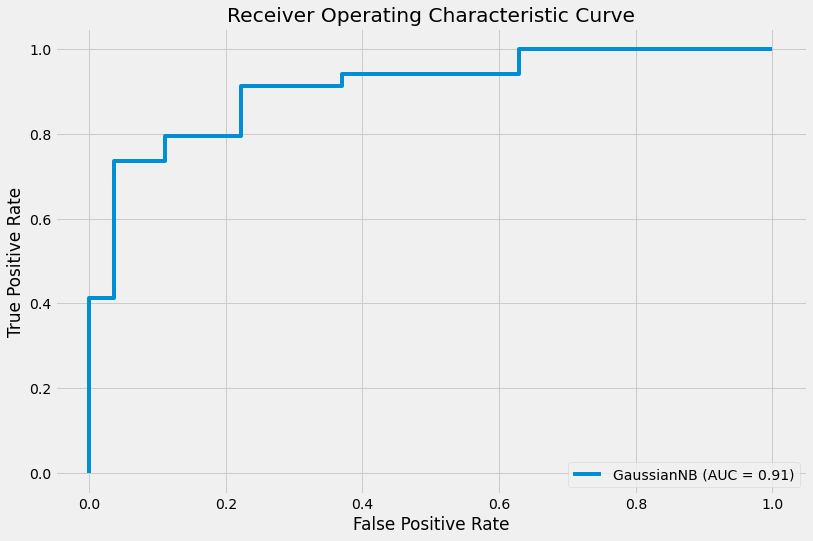

In [117]:
plot_roc_curve(gnb,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("GNB.png")